In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [7]:
import pandas as pd

file_path = "ders_verisi.xlsx" 
df = pd.read_excel(file_path)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 3. MODELLERİ OLUŞTURMA
# 'Haftalık_Çalışma_Süresi_(dk)' sütununu kullanarak X'i oluştur ve dakikayı saate çevir
X = df[["Haftalık_Çalışma_Süresi_(dk)"]].values / 60
y = df["Vize_Notu"].values

### Lineer Regresyon
lin = LinearRegression()
lin.fit(X, y)

### Polynomial Regresyon (2. derece)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

### Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

RandomForestRegressor(n_estimators=200, random_state=42)

Belirli Çalışma Saatleri İçin Başarı Puanı Tahminleri

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


X = df[["Haftalık_Çalışma_Süresi_(dk)"]].values / 60 # Dakikayı saate çevirme
y = df["Vize_Notu"].values

### Lineer Regresyon
lin = LinearRegression()
lin.fit(X, y)

### Polynomial Regresyon 2. derece
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

### Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Tahmin edilecek çalışma saatleri
specified_study_hours = np.array([[0.5], [1.0], [1.5], [2.0]])

# Lineer Model Tahminleri
y_lin_pred_specific = lin.predict(specified_study_hours)
y_lin_pred_specific = np.clip(y_lin_pred_specific, None, 100)
print("Lineer Regresyon Tahminleri:")
for i, hours in enumerate(specified_study_hours):
    print(f"  {hours[0]:.1f} saat çalışma: {y_lin_pred_specific[i]:.2f} puan")

# Polinomial Model Tahminleri
specified_study_hours_poly = poly.transform(specified_study_hours)
y_poly_pred_specific = poly_reg.predict(specified_study_hours_poly)
y_poly_pred_specific = np.clip(y_poly_pred_specific, None, 100)
print("\nPolinomial Regresyon Tahminleri:")
for i, hours in enumerate(specified_study_hours):
    print(f"  {hours[0]:.1f} saat çalışma: {y_poly_pred_specific[i]:.2f} puan")

# Random Forest Model Tahminleri
y_rf_pred_specific = rf.predict(specified_study_hours)
print("\nRandom Forest Regresyon Tahminleri:")
for i, hours in enumerate(specified_study_hours):
    print(f"  {hours[0]:.1f} saat çalışma: {y_rf_pred_specific[i]:.2f} puan")

Lineer Regresyon Tahminleri:
  0.5 saat çalışma: 65.31 puan
  1.0 saat çalışma: 96.66 puan
  1.5 saat çalışma: 100.00 puan
  2.0 saat çalışma: 100.00 puan

Polinomial Regresyon Tahminleri:
  0.5 saat çalışma: 65.61 puan
  1.0 saat çalışma: 94.35 puan
  1.5 saat çalışma: 100.00 puan
  2.0 saat çalışma: 100.00 puan

Random Forest Regresyon Tahminleri:
  0.5 saat çalışma: 64.96 puan
  1.0 saat çalışma: 86.67 puan
  1.5 saat çalışma: 86.67 puan
  2.0 saat çalışma: 86.67 puan


Rapor Cevapları

In [10]:
print("Ders dışı çalışma saatleri miktarı ile sınav puanı arasında bir ilişki var mı?")
print("\nEvet, oluşturulan tüm regresyon modelleri (Lineer, Polinomial ve Random Forest) ders dışı çalışma saatleri ile sınav puanları arasında bir ilişki olduğunu göstermektedir. Grafikler incelendiğinde, çalışma saatleri arttıkça sınav puanlarının da artma eğiliminde olduğu gözlenmektedir. Özellikle Polinomial ve Random Forest modelleri, bu ilişkinin doğrusal olmaktan ziyade daha karmaşık bir yapıya sahip olabileceğini işaret etmektedir.")

print("\nHaftada fazladan 1 saat ders dışı çalışma süresi başarı puanını ortalama ne kadar etkiliyor?")

# Lineer regresyon modelinin katsayısını çekme
linear_coefficient = lin.coef_[0]
print(f"\nLineer regresyon modeline göre, haftada fazladan 1 saat ders dışı çalışma süresi başarı puanını ortalama {linear_coefficient:.2f} puan artırmaktadır. Bu, her ek çalışma saati için sınav puanının ortalama bu miktar kadar yükselmesini bekleyebileceğimiz anlamına gelir. Diğer modeller (Polinomial ve Random Forest) doğrusal olmayan ilişkileri modellediği için, ek bir saatin etkisi çalışma süresinin miktarına göre değişiklik gösterebilir.")

Ders dışı çalışma saatleri miktarı ile sınav puanı arasında bir ilişki var mı?

Evet, oluşturulan tüm regresyon modelleri (Lineer, Polinomial ve Random Forest) ders dışı çalışma saatleri ile sınav puanları arasında bir ilişki olduğunu göstermektedir. Grafikler incelendiğinde, çalışma saatleri arttıkça sınav puanlarının da artma eğiliminde olduğu gözlenmektedir. Özellikle Polinomial ve Random Forest modelleri, bu ilişkinin doğrusal olmaktan ziyade daha karmaşık bir yapıya sahip olabileceğini işaret etmektedir.

Haftada fazladan 1 saat ders dışı çalışma süresi başarı puanını ortalama ne kadar etkiliyor?

Lineer regresyon modeline göre, haftada fazladan 1 saat ders dışı çalışma süresi başarı puanını ortalama 62.70 puan artırmaktadır. Bu, her ek çalışma saati için sınav puanının ortalama bu miktar kadar yükselmesini bekleyebileceğimiz anlamına gelir. Diğer modeller (Polinomial ve Random Forest) doğrusal olmayan ilişkileri modellediği için, ek bir saatin etkisi çalışma süresinin miktarına g

In [11]:
min_X = X.min()
max_X = X.max()
X_range = np.linspace(min_X, max_X, 100).reshape(-1, 1)

y_lin_pred = lin.predict(X_range)

X_poly_range = poly.transform(X_range)
y_poly_pred = poly_reg.predict(X_poly_range)

y_rf_pred = rf.predict(X_range)

print("Generated x_range and predictions for plotting.")

Generated x_range and predictions for plotting.


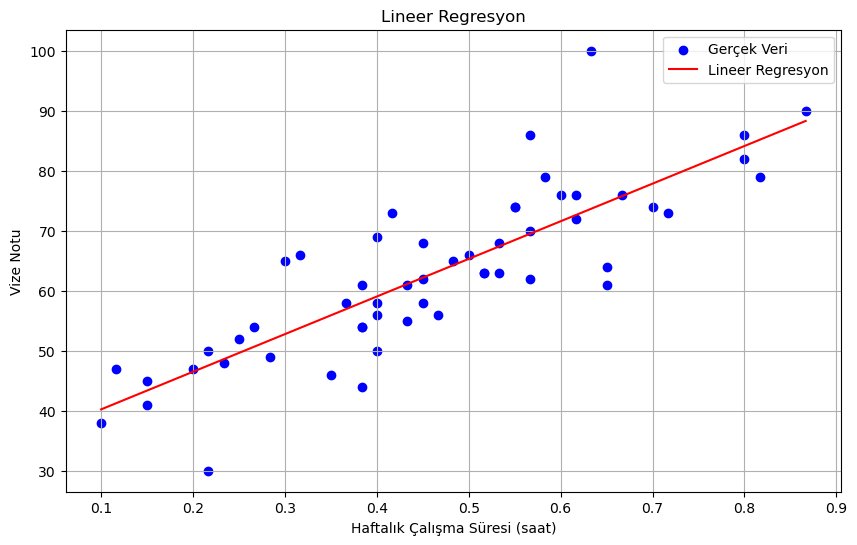

Linear Regression plot 'lineer.png' generated and saved successfully.


In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veri')
plt.plot(X_range, y_lin_pred, color='red', label='Lineer Regresyon')
plt.title('Lineer Regresyon')
plt.xlabel('Haftalık Çalışma Süresi (saat)')
plt.ylabel('Vize Notu')
plt.legend()
plt.grid(True)
plt.savefig('lineer.png')
plt.show()
print("Linear Regression plot 'lineer.png' generated and saved successfully.")


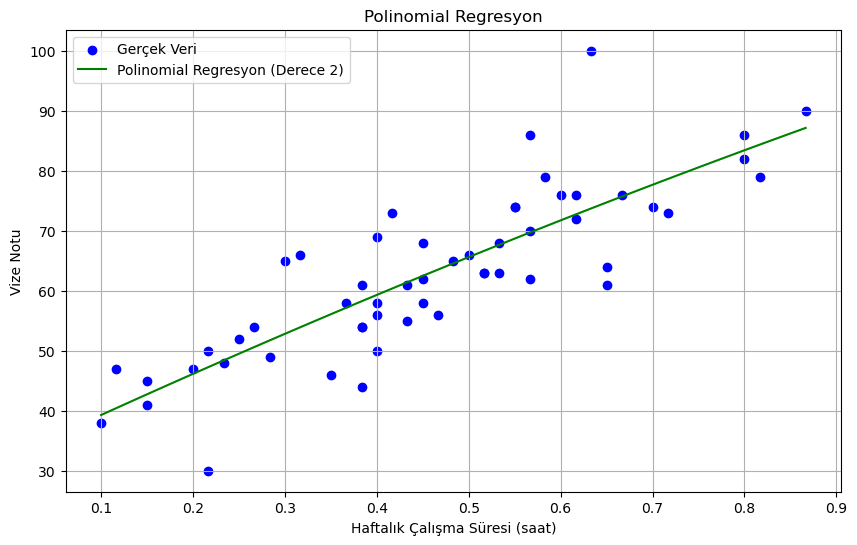

Polynomial Regression plot 'polynomial.png' generated and saved successfully.


In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veri')
plt.plot(X_range, y_poly_pred, color='green', label='Polinomial Regresyon (Derece 2)')
plt.title('Polinomial Regresyon')
plt.xlabel('Haftalık Çalışma Süresi (saat)')
plt.ylabel('Vize Notu')
plt.legend()
plt.grid(True)
plt.savefig('polynomial.png')
plt.show()
print("Polynomial Regression plot 'polynomial.png' generated and saved successfully.")

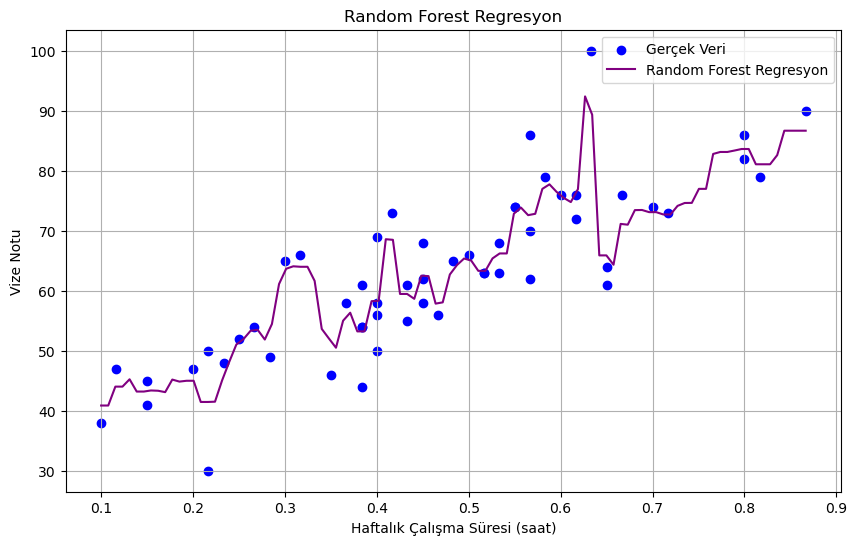

Random Forest Regression plot 'random_forest.png' generated and saved successfully.


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Gerçek Veri')
plt.plot(X_range, y_rf_pred, color='purple', label='Random Forest Regresyon')
plt.title('Random Forest Regresyon')
plt.xlabel('Haftalık Çalışma Süresi (saat)')
plt.ylabel('Vize Notu')
plt.legend()
plt.grid(True)
plt.savefig('random_forest.png')
plt.show()
print("Random Forest Regression plot 'random_forest.png' generated and saved successfully.")